In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


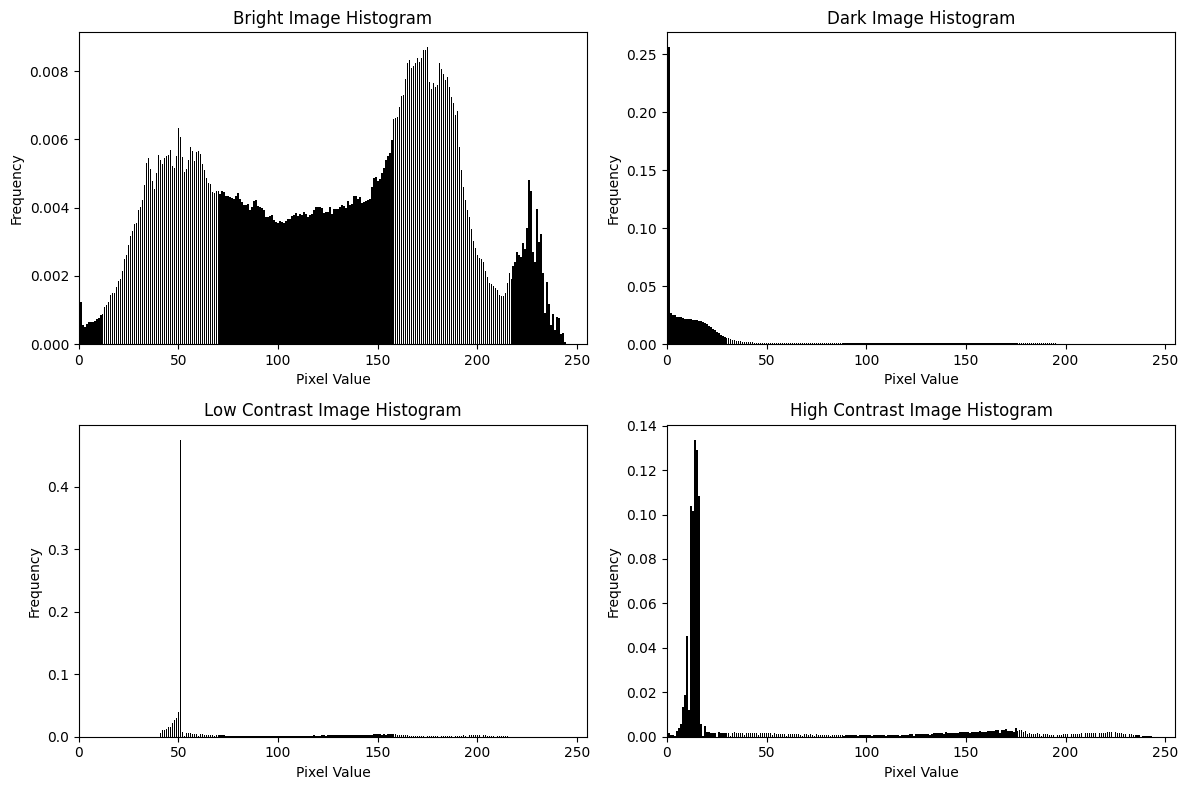

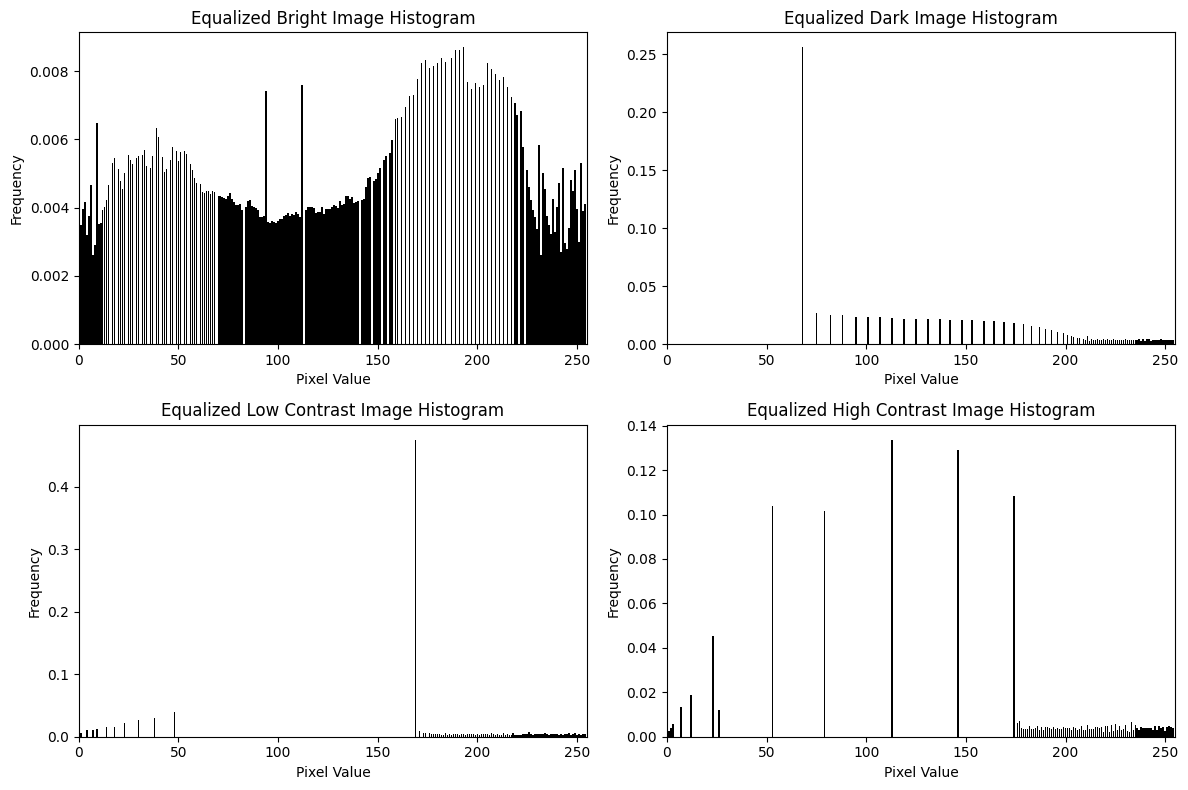

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load and convert an image to grayscale
def load_gray_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

# Calculate histogram manually
def calculate_histogram(image):
    histogram = [0] * 256  # 256 bins for pixel values 0-255
    for i in range(len(image)):
        for j in range(len(image[i])):
            pixel_value = image[i][j]
            histogram[pixel_value] += 1
    return histogram

# Normalize histogram manually
def normalize_histogram(histogram):
    total_pixels = sum(histogram)
    normalized_histogram = [0] * 256
    if total_pixels > 0:
        for i in range(256):
            normalized_histogram[i] = histogram[i] / total_pixels
    return normalized_histogram

# Perform histogram equalization manually
def histogram_equalization(image):
    histogram = calculate_histogram(image)
    cdf = [0] * 256
    cdf[0] = histogram[0]

    # Calculate CDF
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + histogram[i]

    # Normalize CDF to scale from 0 to 255
    cdf_min = min([value for value in cdf if value > 0])  # Find the first non-zero CDF value
    total_pixels = len(image) * len(image[0])

    equalized_image = [[0 for _ in range(len(image[0]))] for _ in range(len(image))]

    for i in range(len(image)):
        for j in range(len(image[i])):
            pixel_value = image[i][j]
            equalized_value = (cdf[pixel_value] - cdf_min) * 255 // (total_pixels - cdf_min)
            equalized_image[i][j] = equalized_value

    return equalized_image

# Display histograms manually
def display_histograms(histograms, titles):
    plt.figure(figsize=(12, 8))
    for i in range(len(histograms)):
        plt.subplot(2, 2, i + 1)
        plt.bar(range(256), histograms[i], color='black')
        plt.title(titles[i])
        plt.xlim(0, 255)
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Main function
if __name__ == "__main__":
    # Load images
    bright_image = load_gray_image('/content/drive/MyDrive/bright.jpg')
    dark_image = load_gray_image('/content/drive/MyDrive/dark.jpg')
    low_contrast_image = load_gray_image('/content/drive/MyDrive/low_contrast.png')
    high_contrast_image = load_gray_image('/content/drive/MyDrive/high_contrast.png')

    # Calculate histograms
    bright_hist = calculate_histogram(bright_image)
    dark_hist = calculate_histogram(dark_image)
    low_contrast_hist = calculate_histogram(low_contrast_image)
    high_contrast_hist = calculate_histogram(high_contrast_image)

    # Normalize histograms
    bright_hist_normalized = normalize_histogram(bright_hist)
    dark_hist_normalized = normalize_histogram(dark_hist)
    low_contrast_hist_normalized = normalize_histogram(low_contrast_hist)
    high_contrast_hist_normalized = normalize_histogram(high_contrast_hist)

    # Display original histograms
    histograms = [
        bright_hist_normalized,
        dark_hist_normalized,
        low_contrast_hist_normalized,
        high_contrast_hist_normalized
    ]
    titles = [
        'Bright Image Histogram',
        'Dark Image Histogram',
        'Low Contrast Image Histogram',
        'High Contrast Image Histogram'
    ]
    display_histograms(histograms, titles)

    # Apply histogram equalization
    equalized_bright_image = histogram_equalization(bright_image)
    equalized_dark_image = histogram_equalization(dark_image)
    equalized_low_contrast_image = histogram_equalization(low_contrast_image)
    equalized_high_contrast_image = histogram_equalization(high_contrast_image)

    # Calculate histograms for equalized images
    equalized_bright_hist = calculate_histogram(equalized_bright_image)
    equalized_dark_hist = calculate_histogram(equalized_dark_image)
    equalized_low_contrast_hist = calculate_histogram(equalized_low_contrast_image)
    equalized_high_contrast_hist = calculate_histogram(equalized_high_contrast_image)

    # Normalize histograms for equalized images
    equalized_bright_hist_normalized = normalize_histogram(equalized_bright_hist)
    equalized_dark_hist_normalized = normalize_histogram(equalized_dark_hist)
    equalized_low_contrast_hist_normalized = normalize_histogram(equalized_low_contrast_hist)
    equalized_high_contrast_hist_normalized = normalize_histogram(equalized_high_contrast_hist)

    # Display equalized histograms
    equalized_histograms = [
        equalized_bright_hist_normalized,
        equalized_dark_hist_normalized,
        equalized_low_contrast_hist_normalized,
        equalized_high_contrast_hist_normalized
    ]
    equalized_titles = [
        'Equalized Bright Image Histogram',
        'Equalized Dark Image Histogram',
        'Equalized Low Contrast Image Histogram',
        'Equalized High Contrast Image Histogram'
    ]
    display_histograms(equalized_histograms, equalized_titles)
